# Intelligent Systems
# Exercise 2 / Design
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

## Exercise 3 - Python Visualization: WSA LÜBECK

### A. Download historical water level data for the period of October 2019 (1st of October until 31st of October)
https://www.pegelonline.wsv.de/webservices/les/Wasserstand+Rohdaten/OSTSEE/LT+KIEL.
(Hint the tool wget might help)

In [1]:
import wget
import pandas as pd

In [2]:
url = 'https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL'
directory = 'D:/WinterSemester-2019-20/IntelligentSystem/Exercise Sheets/Exercise_02/files/'

In [11]:
# Change the following to the available range of date
# 1st of October 2019 - 31st of October 2019
dates = [str(i).zfill(2) + '.11.2019' for i in range(1,32)]
# 5th of October 2019 - 5th of November 2019
dates = [str(i).zfill(2) + '.11.2019' for i in range(23,31)] + [str(i).zfill(2) + '.12.2019' for i in range(1,25)]

In [12]:
print(dates)

['23.11.2019', '24.11.2019', '25.11.2019', '26.11.2019', '27.11.2019', '28.11.2019', '29.11.2019', '30.11.2019', '01.12.2019', '02.12.2019', '03.12.2019', '04.12.2019', '05.12.2019', '06.12.2019', '07.12.2019', '08.12.2019', '09.12.2019', '10.12.2019', '11.12.2019', '12.12.2019', '13.12.2019', '14.12.2019', '15.12.2019', '16.12.2019', '17.12.2019', '18.12.2019', '19.12.2019', '20.12.2019', '21.12.2019', '22.12.2019', '23.12.2019', '24.12.2019']


In [13]:
# Date for example 30.09.2019
make_url = lambda date : url + '/{}/down.csv'.format(date)
make_filename = lambda date : directory + date.replace('.', '-') + '.csv'

In [14]:
# Download water levels for every day
for date in dates:
    print("\n")
    print(make_url(date))
    wget.download(make_url(date), make_filename(date))



https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL/23.11.2019/down.csv
100% [..............................................................................] 21713 / 21713

https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL/24.11.2019/down.csv
100% [..............................................................................] 21713 / 21713

https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL/25.11.2019/down.csv
100% [..............................................................................] 21713 / 21713

https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL/26.11.2019/down.csv
100% [..............................................................................] 21713 / 21713

https://www.pegelonline.wsv.de/webservices/files/Wasserstand+Rohdaten/OSTSEE/LT+KIEL/27.11.2019/down.csv
100% [...............................................................

### B. Load the data into a single pandas dataframe

In [20]:
testDate = dates[0]
testFile = make_filename(testDate)
testData = pd.read_csv(testFile, delimiter=';', encoding='ansi')
print(testData)





#Merge days to a single dataframe for october
df = pd.concat([pd.read_csv(make_filename(date), delimiter=';', parse_dates=True, 
                            index_col=date, encoding='ansi') for date in dates], axis=0)

     23.11.2019  WSA LÜBECK  OSTSEE  LT KIEL  9610050  W_O  cm  XXX,XXX  \
0         00:01         497     NaN      NaN      NaN  NaN NaN      NaN   
1         00:02         497     NaN      NaN      NaN  NaN NaN      NaN   
2         00:03         497     NaN      NaN      NaN  NaN NaN      NaN   
3         00:04         497     NaN      NaN      NaN  NaN NaN      NaN   
4         00:05         497     NaN      NaN      NaN  NaN NaN      NaN   
...         ...         ...     ...      ...      ...  ...  ..      ...   
1435      23:56         526     NaN      NaN      NaN  NaN NaN      NaN   
1436      23:57         526     NaN      NaN      NaN  NaN NaN      NaN   
1437      23:58         526     NaN      NaN      NaN  NaN NaN      NaN   
1438      23:59         526     NaN      NaN      NaN  NaN NaN      NaN   
1439      24:00         526     NaN      NaN      NaN  NaN NaN      NaN   

      XX.XX.XXXX  XX:XX  PNP  -4,987  
0            NaN    NaN  NaN     NaN  
1            NaN    N

In [21]:
df.columns

Index(['WSA LÜBECK', 'OSTSEE', 'LT KIEL', '9610050', 'W_O', 'cm', 'XXX,XXX',
       'XX.XX.XXXX', 'XX:XX', 'PNP', '-4,987'],
      dtype='object')

### C. Visualize the dataframe via matplotlib

In [35]:
df1 = df['WSA LÜBECK']
# df1.replace('XXX,XXX', -1)
df2 = pd.to_numeric(df1.astype(str), errors='coerce').fillna(method='ffill').astype(int)
df3 = pd.to_numeric(df1, errors='coerce')

00:01        497
00:02        497
00:03        497
00:04        497
00:05        497
          ...   
23:56    XXX,XXX
23:57    XXX,XXX
23:58    XXX,XXX
23:59    XXX,XXX
24:00    XXX,XXX
Name: WSA LÜBECK, Length: 46080, dtype: object
now


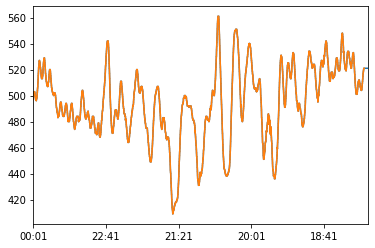

In [39]:
print(df1)
df2.plot()
print("now")
df3.plot()


### D. Approximate the water levels with the usage of numpy.polyfit

In [24]:
import numpy.polynomial.polynomial as polyNew
from matplotlib import pyplot as plt

497
00:01    497
Name: WSA LÜBECK, dtype: int32
First Value 497
Size of df2 (46080,)
<class 'pandas.core.series.Series'>
46080
next2
[ 5.11933521e+02 -4.50143942e-03  1.75579742e-07 -1.54692157e-12]


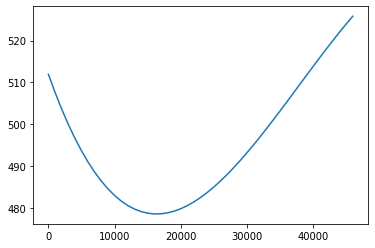

[ 5.03675594e+02 -5.25723798e-04 -2.23164162e-07  1.20320047e-11
 -1.47597024e-16]


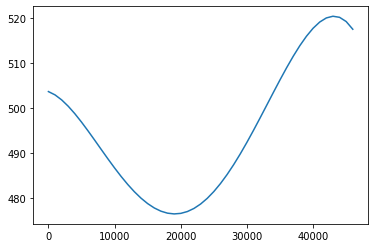

[ 5.04424236e+02 -1.09987317e-03 -1.32024092e-07  6.66632631e-12
 -1.57011190e-17 -1.14692092e-21]


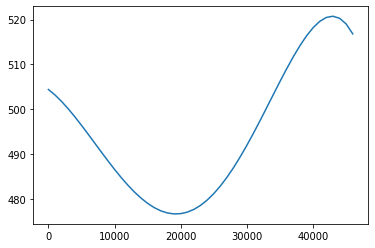

[ 5.09866908e+02 -7.40291988e-03  1.32640520e-06 -1.23368819e-10
  5.34243560e-15 -1.04052431e-19  7.45692104e-25]


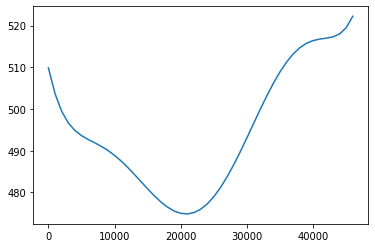

[ 5.15634738e+02 -1.71804268e-02  4.45005164e-06 -5.14244758e-10
  2.91115140e-14 -8.54189080e-19  1.25598010e-23 -7.33795585e-29]


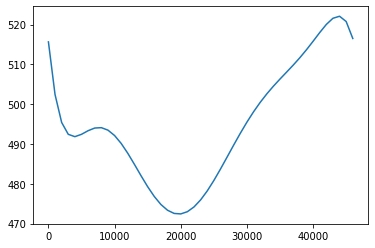

[ 5.08622259e+02 -5.55957399e-05 -2.81516040e-06  6.98912598e-10
 -7.21287275e-14  3.78080025e-18 -1.05734869e-22  1.50502648e-27
 -8.57829369e-33]


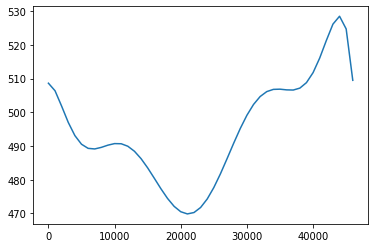

[ 4.97682260e+02  3.82601451e-02 -2.37651110e-05  5.19944768e-09
 -5.63424833e-13  3.41860640e-17 -1.21775020e-21  2.53033807e-26
 -2.83981990e-31  1.33045264e-36]


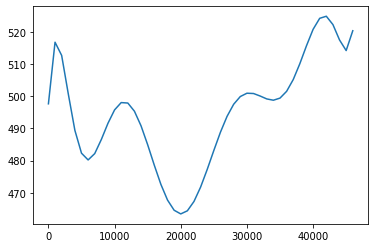

[  8.  14.  22.  32.  44.  58.  74.  92. 112. 134. 158. 184. 212. 242.]


In [57]:
print(df2[0])
print(df2[[0]])
print("First Value", df2[0])
print("Size of df2", df2.shape)
print(type(df2))
print(df2.shape[0])
print("next2")
x_values = list(range(0, df2.shape[0], 1000))
polynomials = list(range(3, 10))


for poly in polynomials:
    coef = polyNew.polyfit(x_values, df2[x_values], poly)
    print(coef)
    y_values = polyNew.polyval(x_values, coef)
    plt.plot(x_values, y_values)
    plt.show()
    


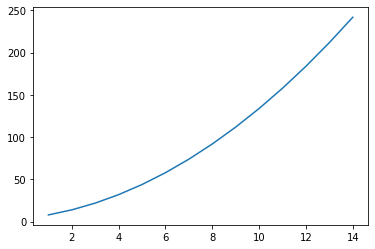

Predicted Coef [-36.  18.]


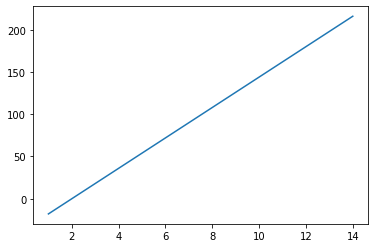

Predicted Coef [4. 3. 1.]


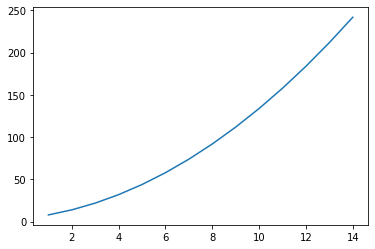

Predicted Coef [4.00000000e+00 3.00000000e+00 1.00000000e+00 7.15506877e-17]


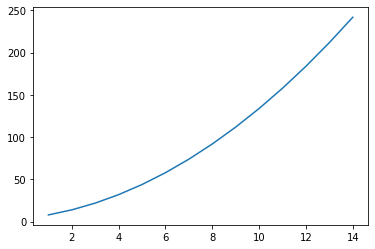

Predicted Coef [ 4.00000000e+00  3.00000000e+00  1.00000000e+00  9.91952716e-16
 -3.49468855e-17]


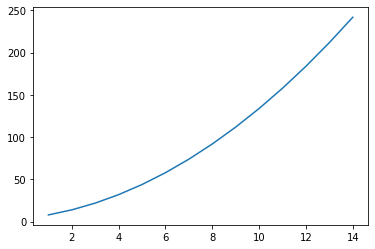

In [66]:
# testing polynomial concepts:
# equation: a x*x + bx + c
# a = 4
# b = 3
# c = 1

x = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y = [ 8,  14,  22,  32,  44,  58,  74,  92, 112, 134, 158, 184, 212, 242]

plt.plot(x, y)
plt.show()

# Everything is known
# Now let's try to predict 
coef = polyNew.polyfit(x, y, 1) #first degree equation
print("Predicted Coef", coef)
yNew = polyNew.polyval(x,coef)
plt.plot(x, yNew)
plt.show()

coef = polyNew.polyfit(x, y, 2) #Second degree equation
print("Predicted Coef", coef)
yNew = polyNew.polyval(x,coef)
plt.plot(x, yNew)
plt.show()

coef = polyNew.polyfit(x, y, 3) #Third degree equation
print("Predicted Coef", coef)
yNew = polyNew.polyval(x,coef)
plt.plot(x, yNew)
plt.show()

coef = polyNew.polyfit(x, y, 4) #Fourth degree equation
print("Predicted Coef", coef)
yNew = polyNew.polyval(x,coef)
plt.plot(x, yNew)
plt.show()
